In [7]:
import sys
sys.path.append('..')
import pympedance.Synthesiser as imps
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook


In [8]:
world = imps.AcousticWorld()

l0 = 1.0
lmid=.2

rad0 = .0075
rad_mid = [.005,.01]

ducts = []
loss=True

duct = imps.Duct(world=world,losses=loss)
duct.append_element(imps.StraightDuct(length=l0,radius=rad0))
ducts.append(duct)
duct.set_termination(imps.PerfectOpenEnd())

for rad_e in rad_mid:
    duct = imps.Duct(world=world,losses=loss)
    duct.append_element(imps.StraightDuct(length=(l0-lmid)/2,radius=rad0))
    duct.append_element(imps.StraightDuct(length=lmid,radius=rad_e))
    duct.append_element(imps.StraightDuct(length=(l0-lmid)/2,radius=rad0))
    ducts.append(duct)
    duct.set_termination(imps.PerfectOpenEnd())

duct = imps.Duct(world=world,losses=loss)
duct.append_element(imps.StraightDuct(length=l0,radius=rad0))
duct.set_termination(imps.PerfectOpenEnd())
ducts.append(duct)

<IPython.core.display.Javascript object>


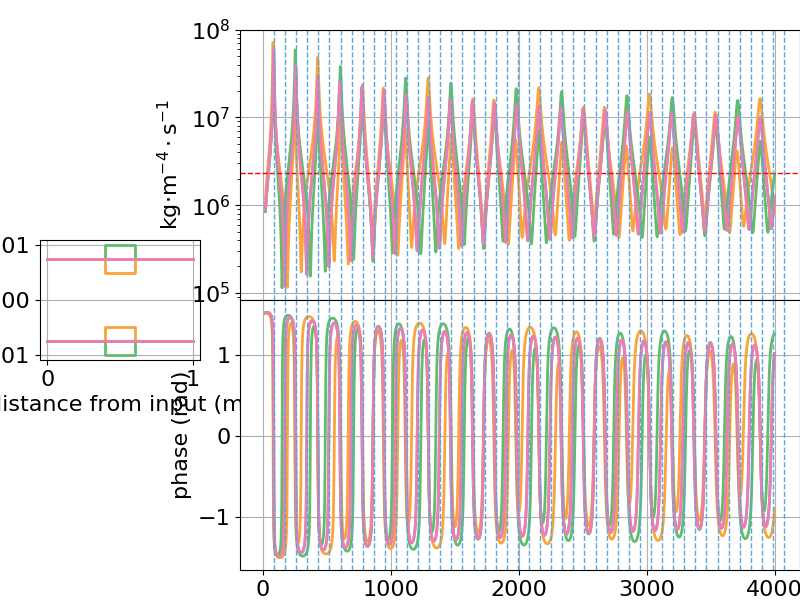

In [9]:
fvec = np.linspace(10,4000,5000)

#fig,ax=pl.subplots(2,sharex=True)

ax = None
for duct in ducts:
    #imped = duct.
    if ax is None:
        ax=duct.plot_report( fmin=20, fmax=max(fvec), npoints=2000)
    else:
        duct.plot_report(ax=ax, fmin=20, fmax=max(fvec), npoints=2000)
    
ax[1].axhline((np.abs(duct.elements[0].get_characteristic_impedance())),
              lw=1,ls='--',color='r')

f=0
c=duct.speed_of_sound
while f < max(fvec):
    f+=c/(4*l0)
    ax[1].axvline(f,ls='--',lw=1)
    ax[2].axvline(f,ls='--',lw=1)

In [11]:
import pympedance._impedance as imp
iobj=imp.Impedance(freq=fvec,imped=duct.get_input_impedance_at_freq(fvec))
iobj.findPeaks()

(array([  84.80679923,  256.72469353,  429.13361498,  601.71562419,
         774.42884135,  947.18330011, 1120.01291407, 1292.8631923 ,
        1465.76375903, 1638.68917064, 1811.62566157, 1984.59430914,
        2157.57931563, 2330.56996476, 2503.5834837 , 2676.60938813,
        2849.64596869, 3022.69197513, 3195.74086372, 3368.80492231,
        3541.87690647, 3714.95607257, 3888.04182046]),
 array([64922573.12036798, 38214380.77603975, 29696841.42722256,
        25113748.53244229, 22198081.05161824, 20115915.83281505,
        18520028.71447083, 17262118.05518204, 16242135.4523217 ,
        15367612.80344052, 14637025.43862182, 14005718.98612093,
        13438405.83090527, 12942517.14556451, 12503655.07142154,
        12107406.83928302, 11740466.22878108, 11408477.63666498,
        11106067.86285113, 10828849.91899705, 10573329.67534322,
        10331291.70367912, 10105815.34610962]),
 array([ 9.62211784, 19.92433272, 26.81747307, 32.38933283, 37.25289305,
        41.60093971, 45.60363

<IPython.core.display.Javascript object>


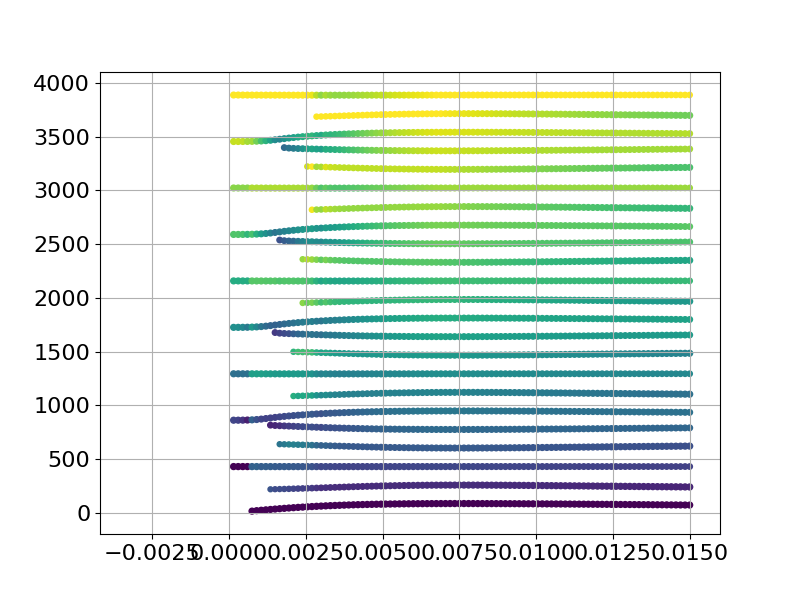

In [12]:
world = imps.AcousticWorld()

l0 = 1.0
lmid=.2

rad0 = .0075
nstep = 100
rad_mid = (rad0*2*(xx+1)/nstep for xx in range(nstep))

ducts = []
loss=True

pks=[]

pl.figure()

for rad_e in rad_mid:
    duct = imps.Duct(world=world,losses=loss)
    duct.append_element(imps.StraightDuct(length=(l0-lmid)/2,radius=rad0))
    duct.append_element(imps.StraightDuct(length=lmid,radius=rad_e))
    duct.append_element(imps.StraightDuct(length=(l0-lmid)/2,radius=rad0))
    ducts.append(duct)
    duct.set_termination(imps.PerfectOpenEnd())
    iobj=imp.Impedance(freq=fvec,imped=duct.get_input_impedance_at_freq(fvec))
    pk = iobj.findPeaks()
    pks.append(pk)
    pl.scatter(rad_e*np.ones_like(pk[0]),pk[0],s=np.log(pk[1]),c=pk[2],marker='o')


In [6]:
pk

(array([  70.92795948,  239.38839718,  429.34861109,  619.69365452,
         789.62451242,  933.77110436, 1102.91813597, 1293.26381658,
        1483.93930545, 1654.4630895 , 1798.39971915, 1967.69399819,
        2158.07716462, 2348.88011835, 2519.84748847, 2663.48928817,
        2832.89480811, 3023.28205756, 3214.15943472, 3385.47786467,
        3528.83163415, 3698.33793223, 3888.71577895]),
 array([40598248.67098407, 82349647.56314026,  4177975.41101785,
        51956471.09669143, 12584257.94925001, 11965248.14607443,
        38887307.72020628,  2510385.85700929, 33740330.72451551,
         8738978.7399699 ,  8778942.7024673 , 29189047.49584076,
         2011918.00906395, 26902465.80585046,  7116585.548494  ,
         7318759.52240623, 24360407.58307536,  1756685.12123842,
        23050510.36612429,  6175950.73022915,  6442837.91023585,
        21350559.89491759,  1598365.53114364]),
 array([  9.40914288,  20.40170012,  29.6805407 ,  35.1030098 ,
         44.19947243,  48.59173515,  4